## 1.4.2 Image Thresholdin

### Simple Thresholding

In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [9]:
resource_path = os.getcwd() + '/resource/'
img = cv2.imread(resource_path + 'backgrounds.jpg',0)

In [10]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

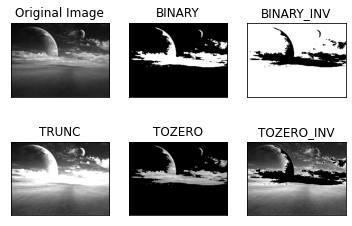

In [11]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [12]:
plt.show()

In [13]:
h,w=256,512
img=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [14]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

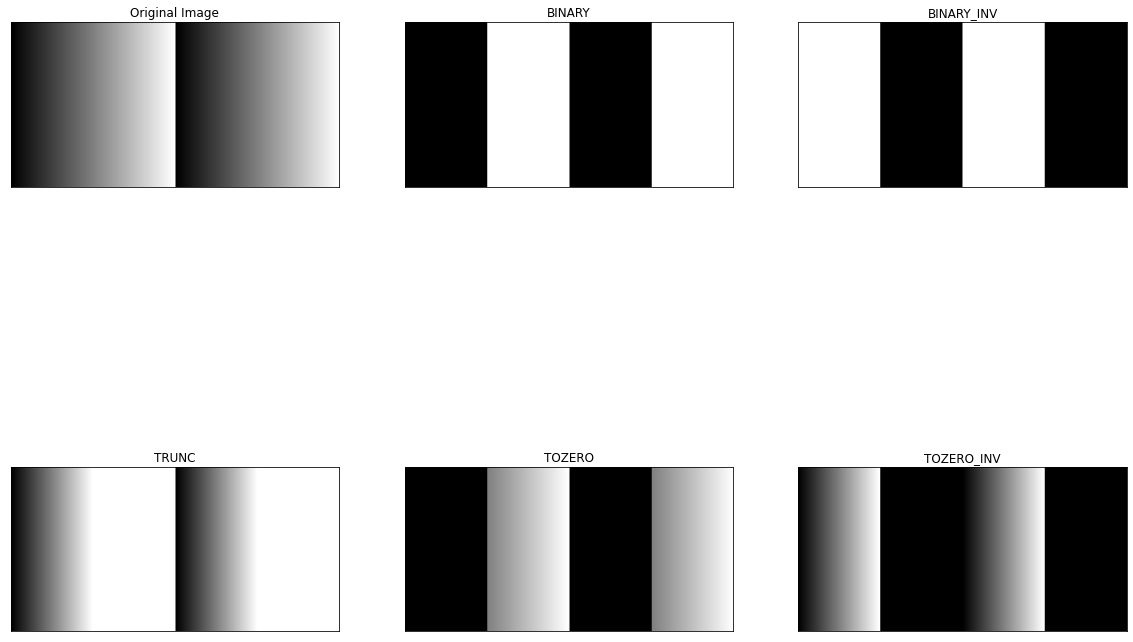

In [15]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding

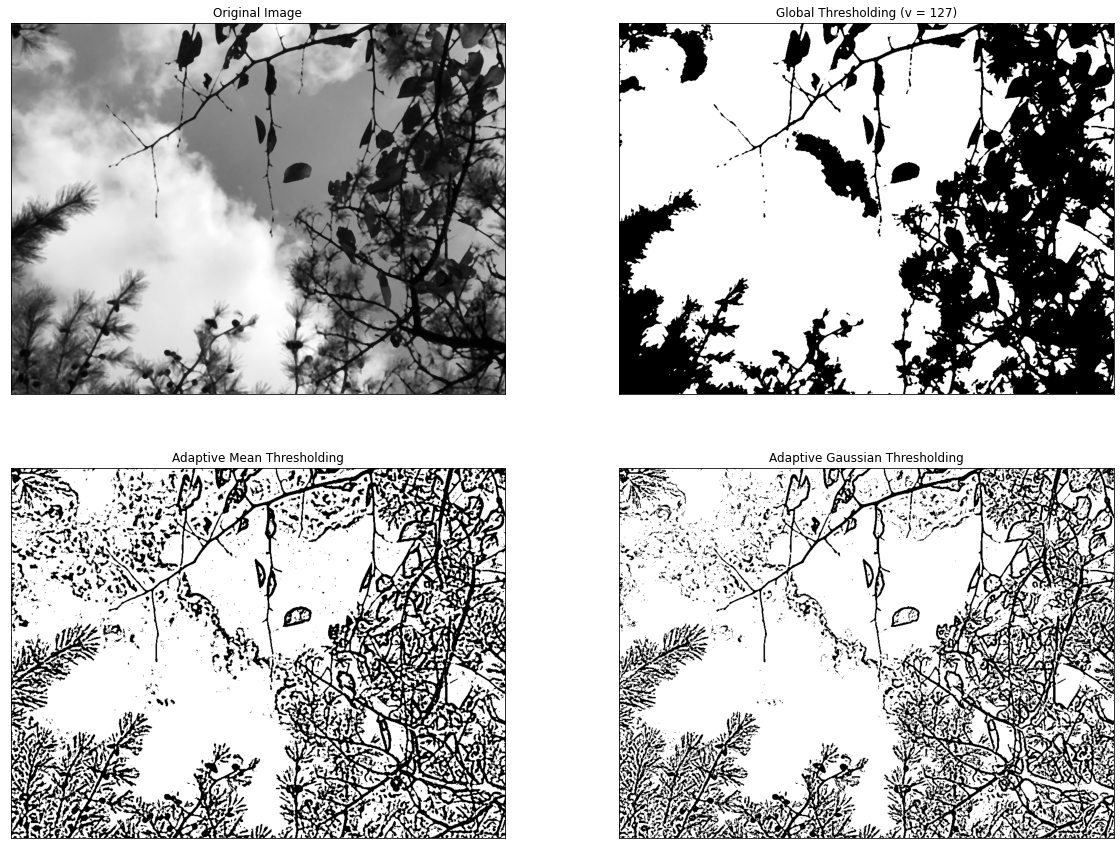

In [22]:
img = cv2.imread(resource_path + 'sIMG_2180.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu’s Binarization

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

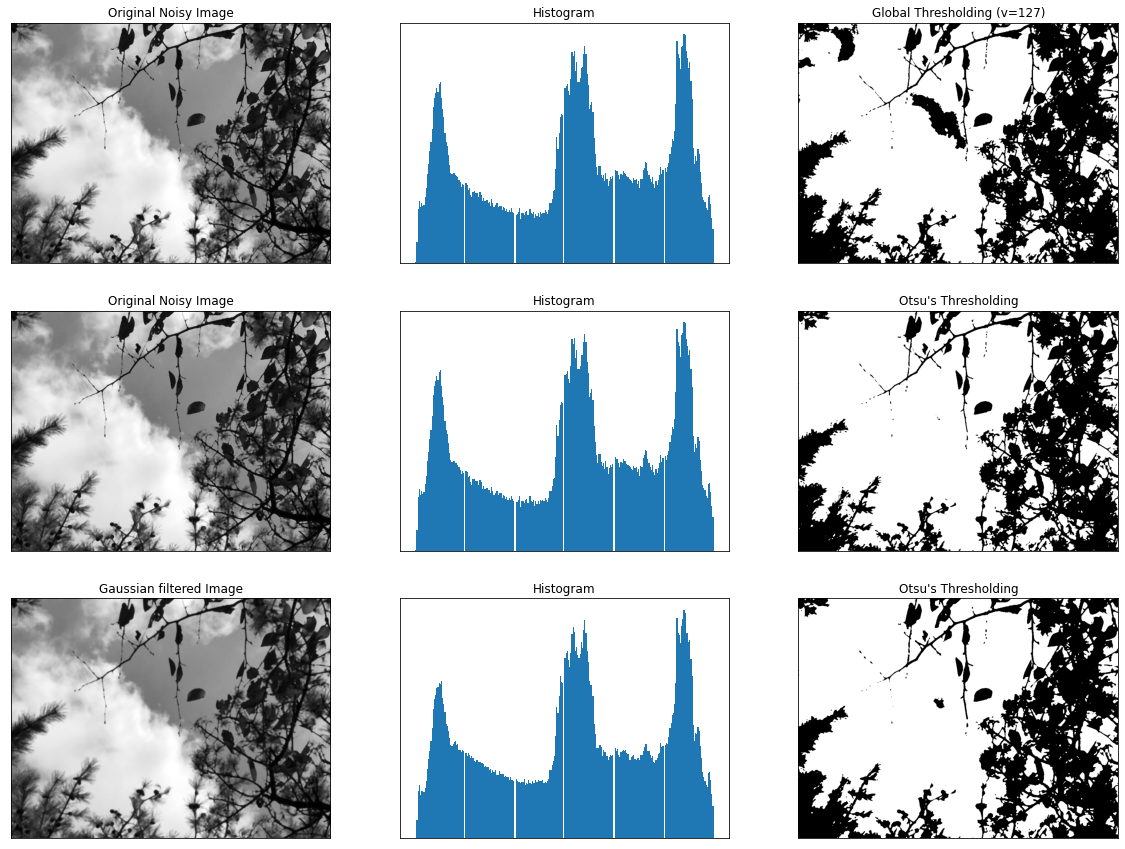

In [26]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,img, 0, th2,blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image','Histogram',
          "Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Histogram

In [28]:
img = cv2.imread(resource_path + 'sIMG_2168.jpg',0)

In [29]:
h,w=img.shape
hist=np.zeros(256, np.uint32)
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [31]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]]+=1
        
hist

array([    0,     0,     6,    16,    76,   204,   466,   862,  1296,
        1946,  2644,  3498,  4420,  5216,  5752,  5650,  5142,  4482,
        4202,  3848,  3790,  3710,  4190,  5014,  5614,  6536,  7542,
        8344,  8996,  9564,  9816, 10704, 11100, 11510, 12284, 12530,
       12720, 12608, 12596, 12388, 12070, 11794, 11068, 10896, 10276,
        9708,  9378,  8682,  8528,  7788,  7476,  7334,  6836,  6820,
        6308,  6242,  6020,  5762,  5302,  5144,  4962,  4756,  4370,
        4144,  4142,  3796,  3810,  3502,  3538,  3424,  3472,  3168,
        3070,  2840,  2860,  2764,  2656,  2580,  2612,  2572,  2432,
        2408,  2296,  2214,  2296,  2196,  2118,  1984,  1994,  2118,
        1928,  1840,  1920,  1914,  1930,  1782,  1858,  1828,  1858,
        1766,  1770,  1776,  1680,  1696,  1600,  1650,  1644,  1630,
        1598,  1600,  1564,  1542,  1542,  1532,  1610,  1596,  1634,
        1598,  1494,  1466,  1552,  1732,  1744,  1962,  2342,  3240,
        4806,  7522,

## Exercise Drow Histogram

In [34]:
h,w,ch=256,512,3
histImage=np.zeros((h,w,3),np.uint8)

for i in range(256):
    l = (int) ((hist[i]/10000)*255)
    histImage = cv2.rectangle(histImage,(2*i,h-0),(2*i+2,h-l),(0,255,0),1)

In [35]:
cv2.imshow('image',histImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

## with Noise

In [42]:
import random

In [37]:
h,w = 256,512
img=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [40]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)]=32


In [43]:
noiseImg = np.copy(img)
m=16
for i in range(h):
    for j in range(w):
        value = img[i,j]+random.randint(-m,m)
        if value <0:
            noiseImg[i,j]=0
        elif value <0:
            noiseImg[i,j]=255
        else :
            noiseImg[i,j]=value

In [45]:
cv2.imshow('image',img)
cv2.imshow('noise image',noiseImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

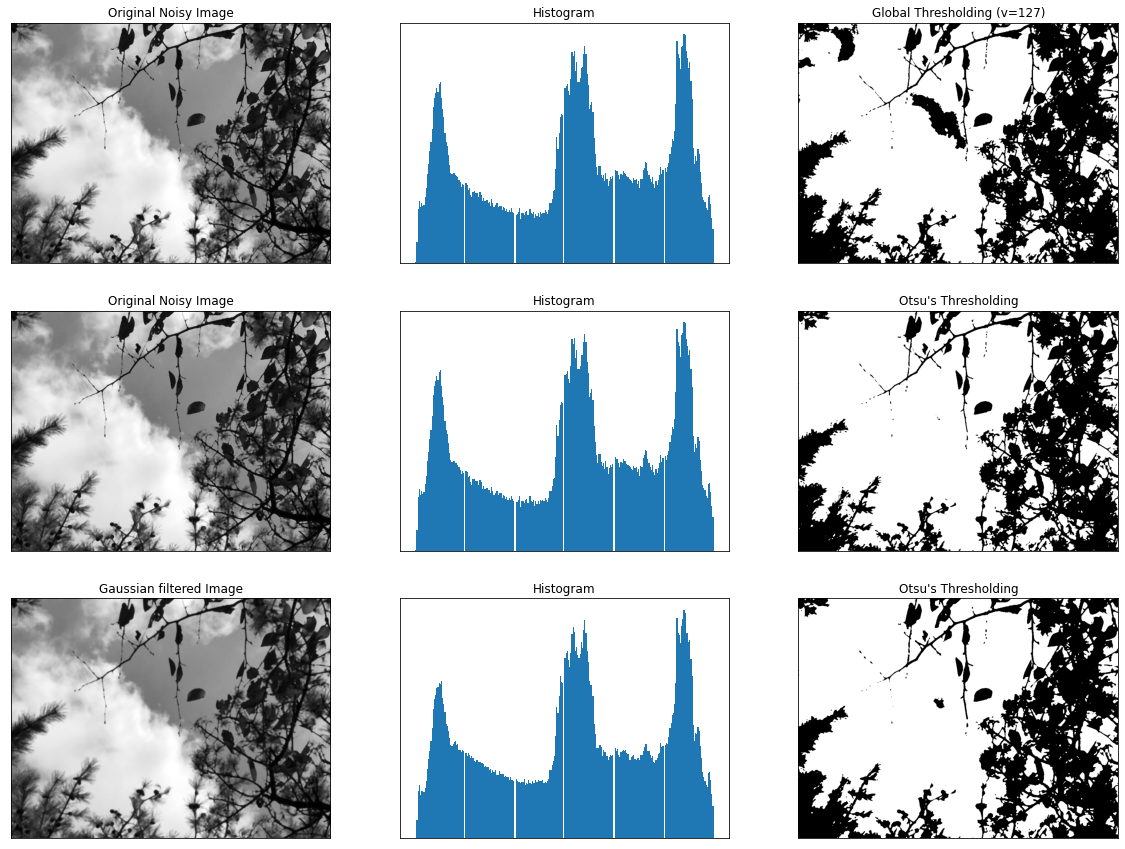

In [46]:
# global thresholding
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image','Histogram',
          "Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()